# 1D Convection-diffusion example

An example adapted from the FiPy convection diffusion 1D example

see: https://pages.nist.gov/fipy/en/latest/generated/examples.convection.exponential1D.mesh1D.html

Written by Ali A. Eftekhari

Last checked: June 2021

---

In [1]:
import pyfvtool as pf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## define the domain
L = 1.0  # domain length
Nx = 25 # number of cells

In [3]:
meshstruct = pf.Grid1D(Nx, L)

In [4]:
c_central = pf.CellVariable(meshstruct, 0.0)

In [5]:
# Set boundary conditions
c_central.BCs.left.a = 0.0 
c_central.BCs.left.b = 1.0 
c_central.BCs.left.c = 0.0 # left boundary
c_central.BCs.right.a = 0.0 
c_central.BCs.right.b = 1.0 
c_central.BCs.right.c = 1.0 # right boundary

In [6]:
c_upwind = c_central.copy() # separate copy for comparison

In [7]:
x = meshstruct.cellcenters.x

In [8]:
## define the transfer coeffs
D_val = 1.0
D = pf.CellVariable(meshstruct, D_val)
Dave = pf.harmonicMean(D) # convert a cell variable to face variable

In [9]:
alfa = pf.CellVariable(meshstruct, 1.0)

In [10]:
u = 10.0
u_face = pf.FaceVariable(meshstruct, u)

In [11]:
## solve
pf.solvePDE(c_central, [ pf.convectionTerm(u_face),
                        -pf.diffusionTerm(Dave)])

pf.solvePDE(c_upwind, [ pf.convectionUpwindTerm(u_face),
                       -pf.diffusionTerm(Dave)]);

In [12]:
c_analytic = (1-np.exp(u*x/D_val))/(1-np.exp(u*L/D_val))

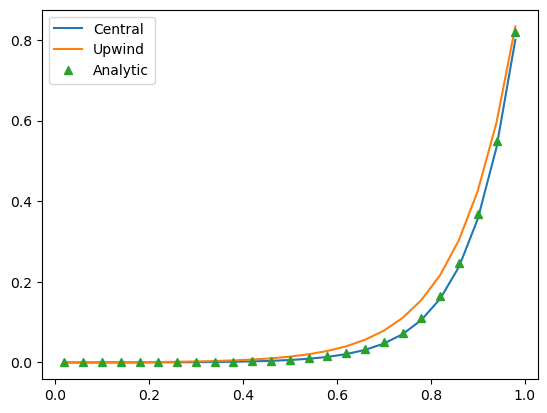

In [13]:
plt.plot(x, c_central.value, label="Central")
plt.plot(x, c_upwind.value, label="Upwind")
plt.plot(x, c_analytic, '^', label = "Analytic")
plt.legend();